# Read a given image file

In [75]:
import sys
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.patches as patches

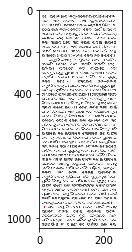

In [2]:
PNG_image = 'test_img1.png'
im = img.imread(PNG_image)
plt.imshow(im, aspect=9/14)
plt.show()

In [3]:
# https://www.quora.com/What-is-the-difference-between-grayscale-image-and-color-image
#grayscale dimensions: mXnX1; RGB dimensions: mXnX3.
def rgb_to_gray(img):
    grayImage = np.zeros(img.shape)
    R = np.array(img[:, :, 0])
    G = np.array(img[:, :, 1])
    B = np.array(img[:, :, 2])
    R = (R *.299)
    G = (G *.587)
    B = (B *.114)
    Avg = (R+G+B)    
    grayImage = img
    for i in range(3):
        grayImage[:,:,i] = Avg
    # return grayImage   (when use this 3D image dont use  cmap="gray" in imshow() )
    return Avg            # (use  cmap="gray") to show 2D grayscale image)

In [4]:
grayImage = rgb_to_gray(im)  
np.shape(grayImage)

(1047, 256)

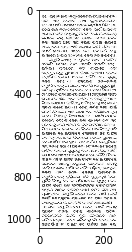

In [5]:
plt.imshow(grayImage, aspect=9/14, cmap="gray")
plt.show()

In [ ]:
test_img_2D = np.ones((5,5))
test_img_2D[1:2,2:] = 0.5 
plt.imshow(test_img_2D, cmap="gray")
plt.title('2D gray scale')
plt.show()

test_img_3D = np.ones((5,5,3))
test_img_3D[:,2:,1] = 0.1  #Red channel
#test_img[:,2:,1] = 1   #Green channel
#test_img[:,:,1] = 0.0  #Blue channel
plt.imshow(test_img_3D)
plt.title('3D RGB')
plt.show()

# Detect lines 

In [6]:
# Calculate mean intensities per pixel
#@ args: gray scale ima 2D matrix 
def calc_intesity_per_row(img_2D):
    mean_intensity = np.zeros(np.shape(img_2D)[0])
    for i in range(np.shape(img_2D)[0]):
        mean_intensity[i] = 1-np.mean(img_2D[i:])  # since black is signal, 
    return mean_intensity

# Get start and end of each possible line 
#@args: mean_intensity is an array with mean black intesity per row wise pixel 
#@args windows : to check prev and next 'windows' points to find maxima/minima
def get_line_ending_index(mean_intensity, window=1):
    line_index = []
    p,m,n =-1.0,-1.0,-1.0
    start, end = 0,0 
    for i in range(window,np.shape(mean_intensity)[0]-window):
        p,m,n = mean_intensity[i-window],mean_intensity[i],mean_intensity[i+window]
        if p < m and m > n:
            start = i
        elif p > m and m < n:
            end = i
            line_index.append([start,end])        
            start = end
            end = 0
        elif p!=0 and  m == 0 :  # If intesity is completely zero it could be the a dip or end of page
            end = i
            line_index.append([start,end])        
            start = end
            end = 0    
    return line_index


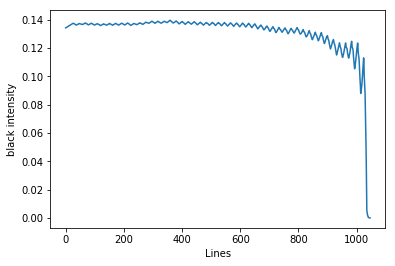

In [7]:
mean_intensity = calc_intesity_per_row(grayImage)
plt.plot(range(np.shape(mean_intensity)[0]),mean_intensity)
plt.ylabel('black intensity')
plt.xlabel('Lines')
plt.show()

# Detect words or letters

(30, 256)
(256, 30)


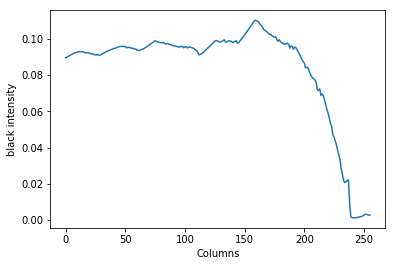

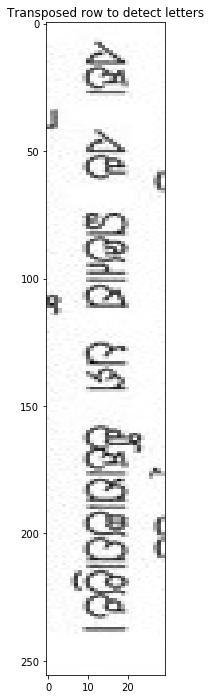

In [69]:
line_index = get_line_ending_index(mean_intensity,window=2)
margin_pixel =10
l=2
row_img = grayImage[line_index[l:l+1][0][0]-margin_pixel:line_index[l:l+1][0][1]+margin_pixel]
print(np.shape(row_img))
print(np.shape(row_img.transpose()))


row_intesity = calc_intesity_per_row(row_img.transpose())
plt.plot(range(np.shape(row_intesity)[0]),row_intesity)
plt.ylabel('black intensity')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10,12))
plt.imshow(row_img.transpose(), aspect=9/14, cmap="gray")
plt.title('Transposed row to detect letters')
plt.show()


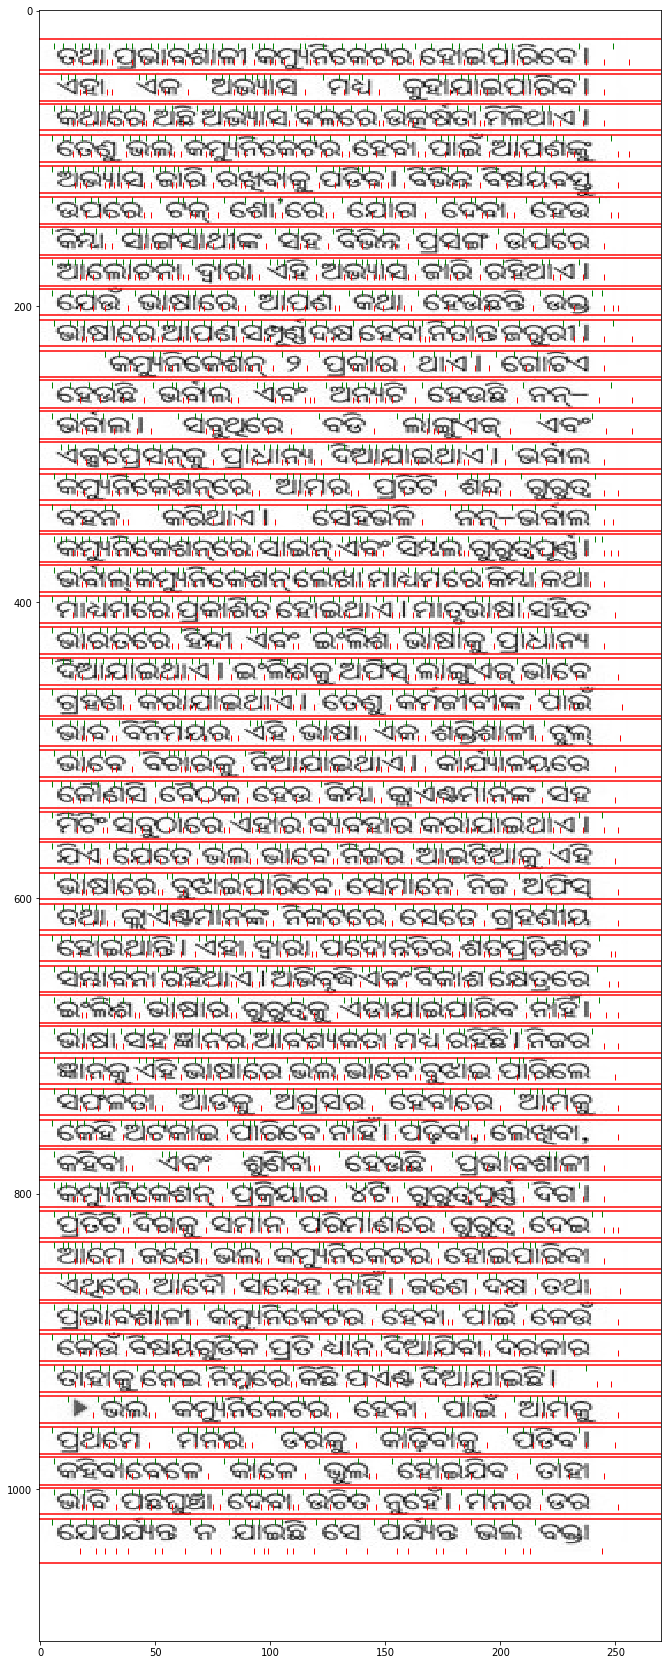

In [76]:
line_index = get_line_ending_index(mean_intensity, 1)
#print(line_index)
margin_pixel =7   ## fine tune to get better rows
margin_pixel_w =3  # Fine tune to get better letters 
plt.figure(figsize=(28,30))
#plt.imshow(grayImage[line_index[l:l+1][0][0]-margin_pixel:line_index[l:l+1][0][1]+margin_pixel-1], aspect=9/14, cmap="gray")
plt.imshow(grayImage, aspect=9/14, cmap="gray")
for l in range(0,len(line_index)):
    plt.axhline(y=line_index[l:l+1][0][0]-margin_pixel, color='r' )
    plt.axhline(y=line_index[l:l+1][0][1]+margin_pixel-1, color='r' )
    row_img = grayImage[line_index[l:l+1][0][0]-margin_pixel:line_index[l:l+1][0][1]+margin_pixel-1]
    word_index = get_line_ending_index(calc_intesity_per_row(row_img.transpose()), 1)
    #rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    #plt.gca().add_patch(rect)
    plt.plot([l[0]-margin_pixel_w for l in word_index],[line_index[l:l+1][0][0] for i in range(len(word_index))], marker=2, color='green', linewidth=0)
    plt.plot([l[1]+margin_pixel_w for l in word_index],[line_index[l:l+1][0][1] for i in range(len(word_index))], marker=2, color='red', linewidth=0)
    #plt.plot([l[1] for l in word_index],[19 for i in range(len(word_index))], marker='.', color='green', linewidth=0)    
plt.show()

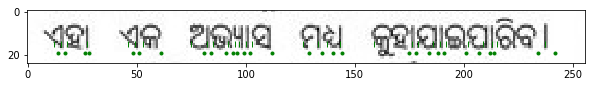

In [66]:
l=1
row_img = grayImage[line_index[l:l+1][0][0]-margin_pixel:line_index[l:l+1][0][1]+margin_pixel]
word_index = get_line_ending_index(calc_intesity_per_row(row_img.transpose()), 1)
margin_pixel_w =3  # Fine tune to get better letters 
plt.figure(figsize=(10,12))
plt.imshow(row_img, cmap="gray")
plt.plot([l[0] for l in word_index],[15 for i in range(len(word_index))], marker='|', color='green', linewidth=0)
plt.plot([l[1] for l in word_index],[19 for i in range(len(word_index))], marker='.', color='green', linewidth=0)
for c in range(0,len(word_index)): #
    #plt.imshow(row_img[ :,range(word_index[c:c+1][0][0]-margin_pixel_w,word_index[c:c+1][0][1]+margin_pixel_w) ], cmap="gray")
    #plt.title(np.shape(row_img[ :,range(word_index[c:c+1][0][0],word_index[c:c+1][0][1]) ]))
    #plt.xlabel(word_index[c:c+1][0])    
    pass
plt.show()

# Export test letters

In [89]:
img_sl = 0
%matplotlib auto
plt.ioff()
for l in range(0,1): #len(line_index)
    #plt.axhline(y=line_index[l:l+1][0][0]-margin_pixel, color='r' )
    #plt.axhline(y=line_index[l:l+1][0][1]+margin_pixel-1, color='r' )
    row_img = grayImage[line_index[l:l+1][0][0]-margin_pixel:line_index[l:l+1][0][1]+margin_pixel-1]
    word_index = get_line_ending_index(calc_intesity_per_row(row_img.transpose()), 1)   
    for c in range(0,len(word_index)): #
        #plt.imshow(row_img[ :,range(word_index[c:c+1][0][0]-margin_pixel_w,word_index[c:c+1][0][1]+margin_pixel_w) ], cmap="gray")
        data = row_img[ :,range(word_index[c:c+1][0][0]-margin_pixel_w,word_index[c:c+1][0][1]+margin_pixel_w) ]
        plt.imsave("train/img_%d_%d.png"%(l,c),data, cmap = "gray")
        
    

Using matplotlib backend: Qt5Agg
